In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve
from scipy.signal import find_peaks
from scipy.optimize import curve_fit



# import lightkurve as lk
# from scipy.optimize import curve_fit

# from astropy.convolution import Gaussian1DKernel
# from astropy.convolution import convolve
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

Already have data downloaded for Gaia ID 1923544057484996224.
If you want to check for new data, run `janet.update()`.
### Running Simple Astropy Lomb-Scargle on Sector 16 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16 on star 1923544057484996224 ###
### Saved results ###
### Running Wavelet Estimation for Sector 16 on star 1923544057484996224 ###


/Users/Anaconda/anaconda3/envs/michael/lib/python3.8/site-packages/jazz_hands-0.0.3-py3.8.egg/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/74 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 16 on star 1923544057484996224 ###
### Saved results ###
### Running Composite ACF estimation for Sector 16 on star 1923544057484996224 ###
### Completed Composite ACF estimation for Sector 16 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 17 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 17 on star 1923544057484996224 ###
### Saved results ###
### Running Wavelet Estimation for Sector 17 on star 1923544057484996224 ###


  0%|          | 0/74 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector 17 on star 1923544057484996224 ###
### Saved results ###
### Running Composite ACF estimation for Sector 17 on star 1923544057484996224 ###
### Completed Composite ACF estimation for Sector 17 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector all on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector all on star 1923544057484996224 ###
### Saved results ###
### Running Wavelet Estimation for Sector all on star 1923544057484996224 ###


  0%|          | 0/151 [00:00<?, ?it/s]

### Completed Wavelet Estimation for Sector all on star 1923544057484996224 ###
### Saved results ###
### Running Composite ACF estimation for Sector all on star 1923544057484996224 ###
### Completed Composite ACF estimation for Sector all on star 1923544057484996224 ###
### Saved results ###
### Running ACF Estimation on star 1923544057484996224 ###
### Completed ACF Estimation on star 1923544057484996224 ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###
### Saved results ###


/Users/oliver hall/Research/michael/Examples/../michael/plotting.py:334: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterized" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f'{j.output_path}/{j.gaiaid}/output.pdf', rasterized=True)



------ Decoding Overall Period Flag 641 ------
512: One or more sectors disagrees strongly across all estimates with the others. This may indicate signal from a background star present in those sectors.
128: The ACF period does not match the 'best' period within 2 sigma.
1: Best rotation is from the Simple Lomb Scargle (SLS) method.

No other flags raised. 

### Saved results ###


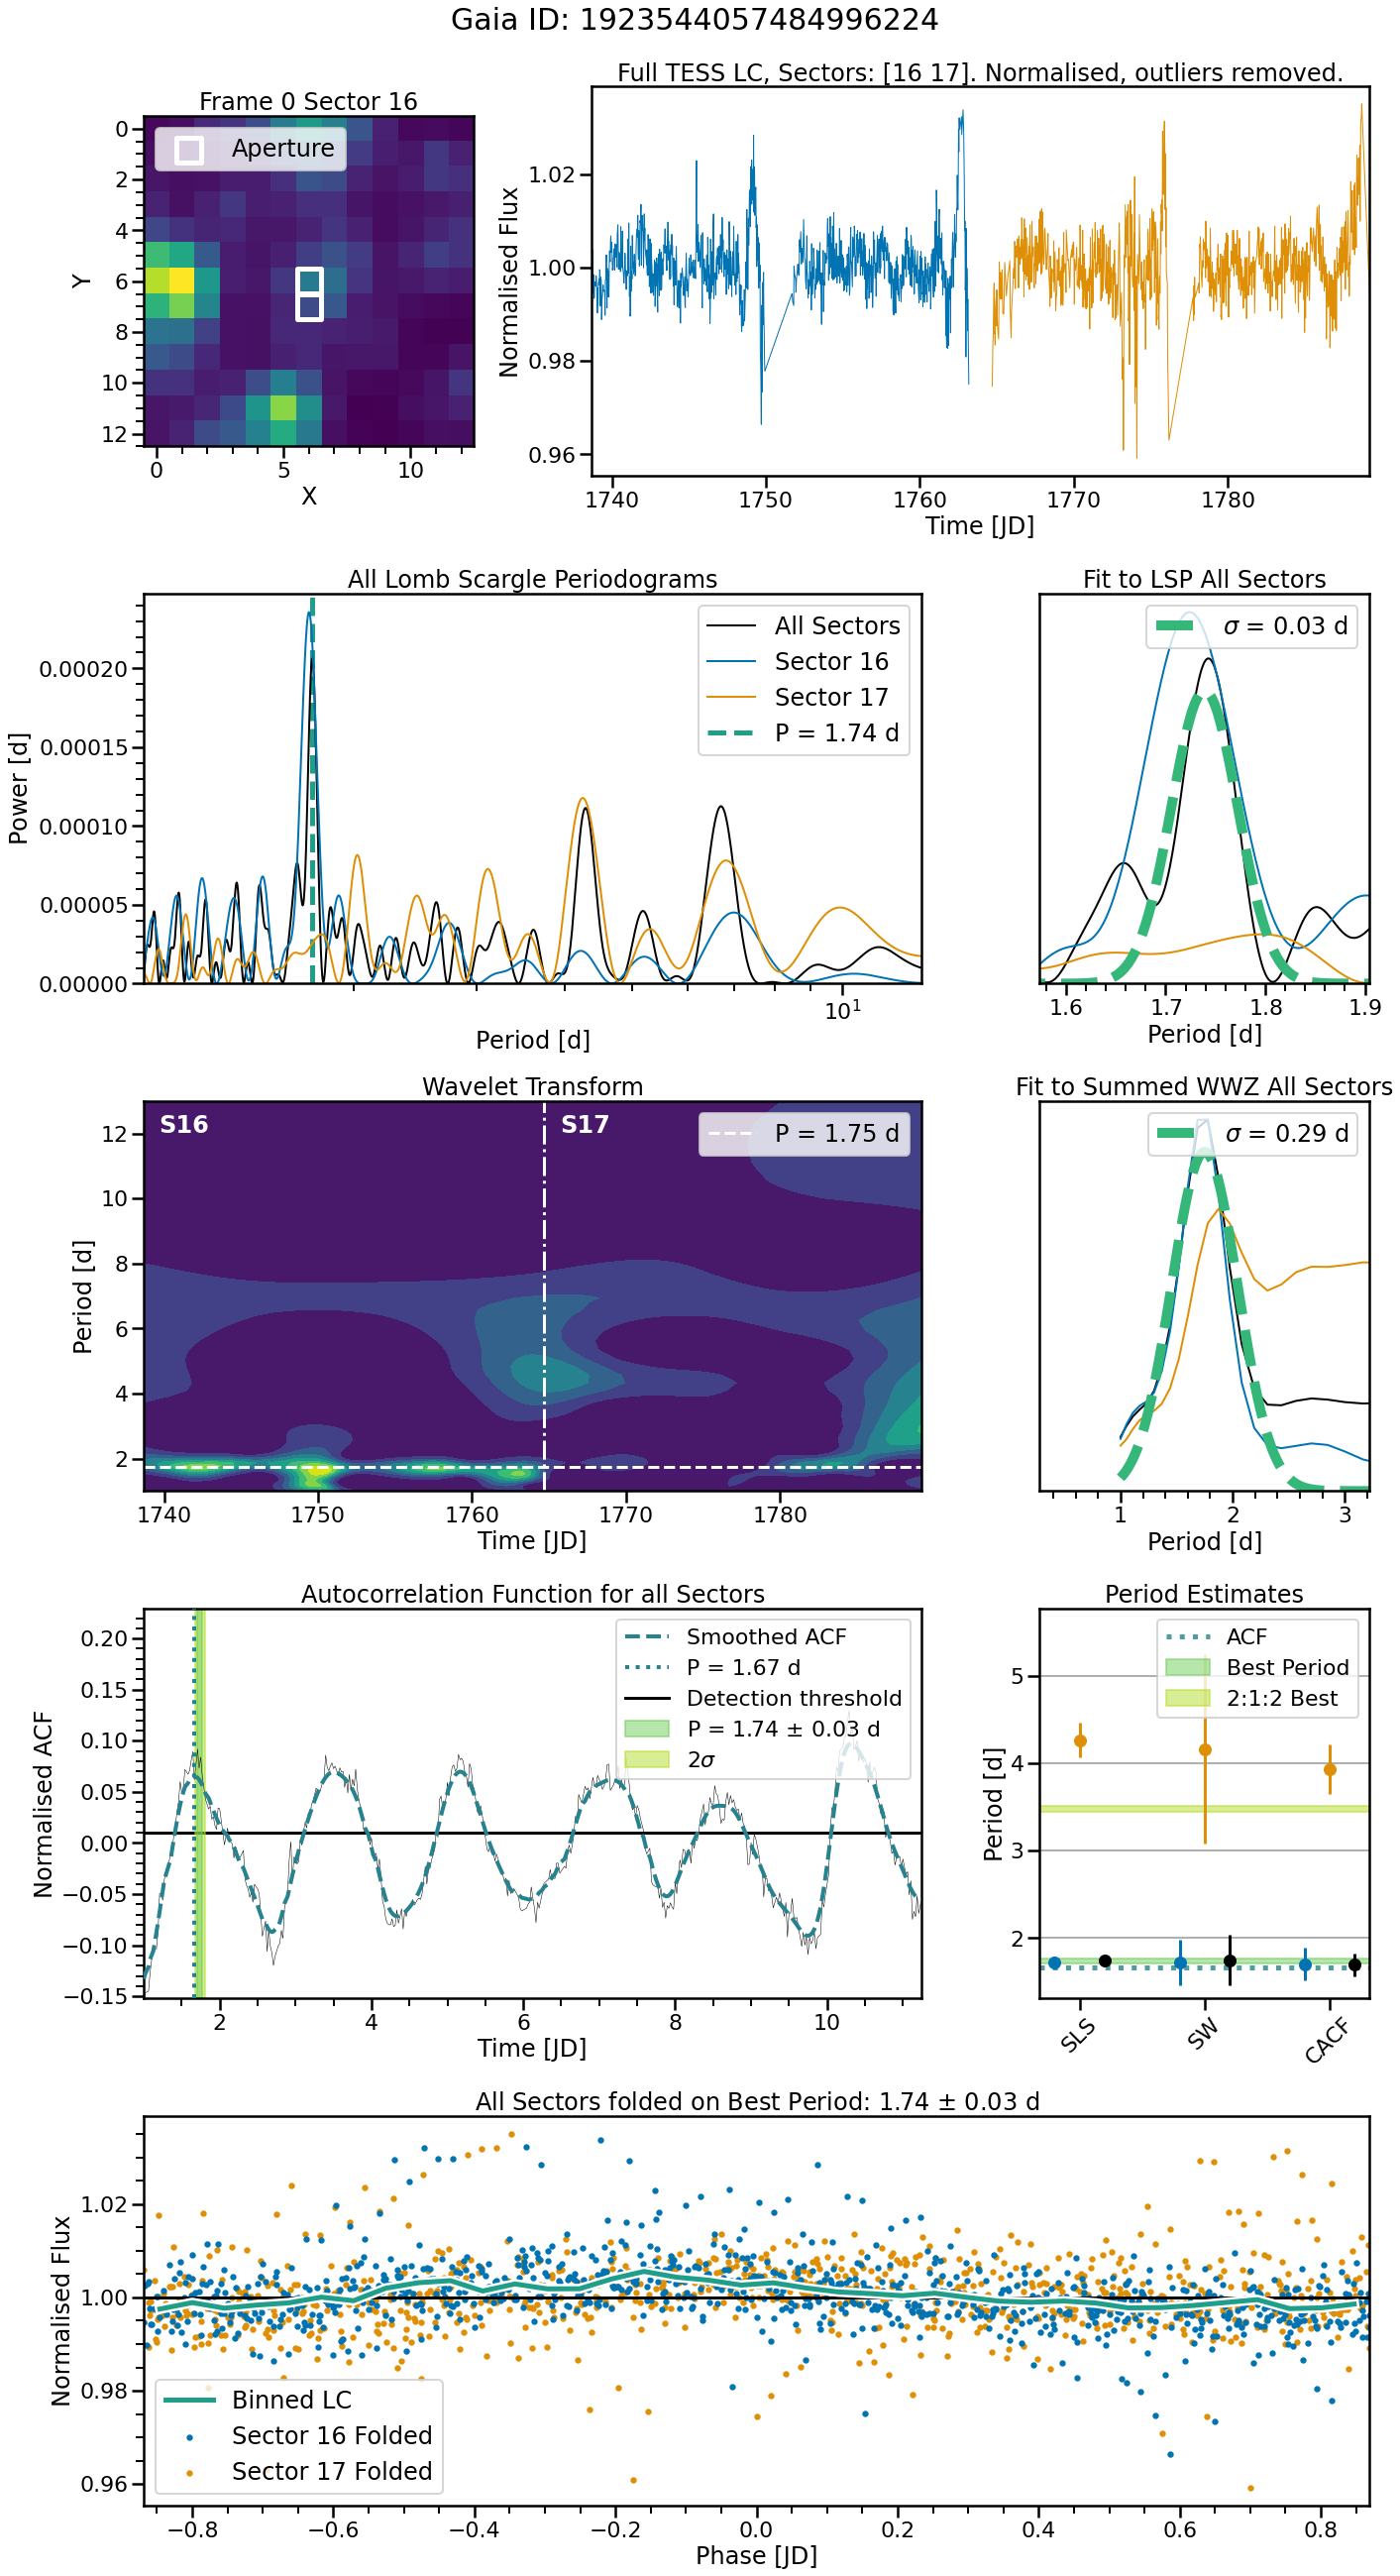

In [3]:
j = janet.boot(uni, index=258)
j.run(period_range = (1., 13.))

In [4]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,CACF,e_CACF,ACF,s_SLS,s_SW,s_CACF,overall,e_overall,f_overall
16,1.724310,0.047082,0.0,1.722282,0.258610,1.701843,0.187478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,4.264724,0.198196,0.0,4.164415,1.082628,3.932869,0.284949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all,1.739086,0.033157,0.0,1.750047,0.294660,1.693756,0.134287,1.666694,NaN,NaN,NaN,NaN,NaN,NaN
best,1.739086,0.033157,0.0,1.750047,0.294660,1.693756,0.134287,NaN,all,all,all,1.739086,0.033157,641.0


KeyError: '5_cacf'

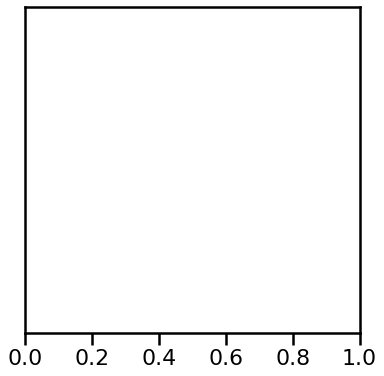

In [5]:
      
best_cacf = '5'

fig, ax = plt.subplots(figsize=(6, 6))
ax.get_yaxis().set_visible(False)

x = j.void[f'{best_cacf}_cacf'].time.value
ax.plot(x,
        _gaussian_fn(x, *j.void[f'{best_cacf}_cacf_popt']), ls='--', lw=10, c=cmap[5], zorder=2)
#         label = rf'$\sigma$ = {j.results.loc["best", "e_SLS"]:.2f} d')
ax.set_xlim(j.void[f'{best_cacf}_cacf_popt'][0] - 5*j.void[f'{best_cacf}_cacf_popt'][1],
                j.void[f'{best_cacf}_cacf_popt'][0] + 5*j.void[f'{best_cacf}_cacf_popt'][1])

for s in j.sectors:
    ax.plot(j.void[f'{s}_cacf'].time.value, j.void[f'{s}_cacfsmoo'])
    
ax.legend(loc='best', fontsize=20)
ax.set_xlabel('Period [d]')
ax.set_title(f'Fit to CACF {text}')        